# Homework 2 Suggested Solution

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Question 1

The major difference comes from the vocabulary. See (`vectorizer.get_feature_names_out()`). That is, how to recognize a word is different between the two.

# Question 2

In [132]:
import copy
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import OrderedDict

In [133]:
import math

def cosine_sim(vec1, vec2):
    """
    Since our vectors are dictionaries, lets convert them to lists for easier mathing.
    """
    vec1 = [val for val in vec1.values()]
    vec2 = [val for val in vec2.values()]
    
    dot_prod = 0
    for i, v in enumerate(vec1):
        dot_prod += v * vec2[i]
        
    mag_1 = math.sqrt(sum([x**2 for x in vec1]))
    mag_2 = math.sqrt(sum([x**2 for x in vec2]))
    
    return dot_prod / (mag_1 * mag_2)

In [134]:
doc_0 = "The faster Harry got to the store, the faster Harry, the faster, would get home."
doc_1 = "Harry is hairy and faster than Jill."
doc_2 = "Jill is not as hairy as Harry."

In [135]:
corpus = [doc_0, doc_1, doc_2]

vectorizer = TfidfVectorizer(min_df=1)
model = vectorizer.fit_transform(corpus)

print(model.todense())  # The model becomes a sparse numpy matrix, as in a large corpus there would be mostly zeros to deal with.  todense() brings it back to a regular numpy matrix for our viewing pleasure.

[[0.         0.         0.42662402 0.18698644 0.18698644 0.
  0.22087441 0.18698644 0.         0.         0.         0.18698644
  0.         0.74794576 0.18698644 0.18698644]
 [0.46312056 0.         0.35221512 0.         0.         0.35221512
  0.27352646 0.         0.35221512 0.35221512 0.         0.
  0.46312056 0.         0.         0.        ]
 [0.         0.75143242 0.         0.         0.         0.28574186
  0.22190405 0.         0.28574186 0.28574186 0.37571621 0.
  0.         0.         0.         0.        ]]


In [136]:
vector_template = OrderedDict((token, 0) for token in vectorizer.get_feature_names_out())
print(vector_template)

OrderedDict([('and', 0), ('as', 0), ('faster', 0), ('get', 0), ('got', 0), ('hairy', 0), ('harry', 0), ('home', 0), ('is', 0), ('jill', 0), ('not', 0), ('store', 0), ('than', 0), ('the', 0), ('to', 0), ('would', 0)])


In [137]:
document_vectors = []
for doc in model.todense().tolist():

    vec = copy.copy(vector_template)  # So we are dealing with new objects, not multiple references to the same object

    for key, value in zip(vectorizer.get_feature_names_out(), doc):
        vec[key] = value
    document_vectors.append(vec)

KeyboardInterrupt: 

In [ ]:
query = "How long does it take to get to the store?"
test_vec = vectorizer.transform([query]).todense() 
print(test_vec)

[[0.         0.         0.         0.37796447 0.         0.
  0.         0.         0.         0.         0.         0.37796447
  0.         0.37796447 0.75592895 0.        ]]


In [ ]:
test = copy.copy(vector_template)
for key, value in zip(vectorizer.get_feature_names_out(), test_vec.tolist()[0]):
    test[key] = value
print(test)

OrderedDict([('and', 0.0), ('as', 0.0), ('faster', 0.0), ('get', 0.37796447300922725), ('got', 0.0), ('hairy', 0.0), ('harry', 0.0), ('home', 0.0), ('is', 0.0), ('jill', 0.0), ('not', 0.0), ('store', 0.37796447300922725), ('than', 0.0), ('the', 0.37796447300922725), ('to', 0.7559289460184545), ('would', 0.0)])


In [ ]:
print(cosine_sim(test, document_vectors[0]))
print(cosine_sim(test, document_vectors[1]))
print(cosine_sim(test, document_vectors[2]))

0.5653938522457077
0.0
0.0


# Question 3

In [ ]:
path = '/Users/yeabinmoon/Documents/ibs_course/BUS243_NLP/HW/data/pg70373.txt'

In [ ]:
filename = path
file = open(filename, 'rt')
text = file.read()
file.close()

### 1. use just whitespace

In [ ]:
words = text.split()

In [ ]:
len(words)

86524

In [ ]:
puncs = [',', '.', '--', '-', '!', '?', ':', ';', '``', "''", '(', ')', '[', ']']
word_list = [x.lower() for x in words if x not in puncs]

In [ ]:
len(word_list)

86519

In [ ]:
df1 = pd.DataFrame.from_dict(dict(Counter(word_list).most_common()),orient='index',columns=['freq'])
df1.head(10)

NameError: name 'Counter' is not defined

In [ ]:
# set up the dataframe
df1.reset_index(inplace=True)
df1.reset_index(inplace=True)
df1 = df1.iloc[:,[0,2]]
df1.columns = ['rank','freq']
df1 = df1.set_index('rank')

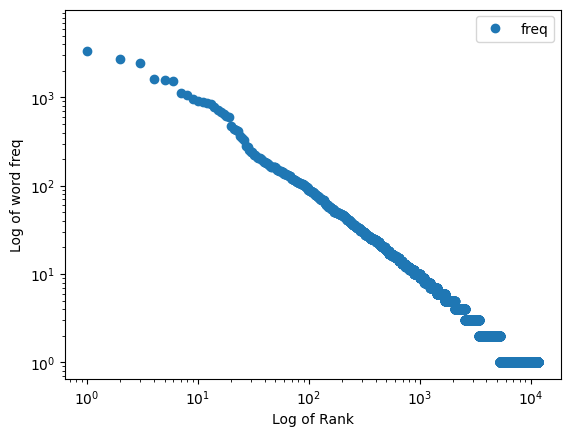

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df1.plot(style='o', logx=True, logy=True, ax=ax)

xlabel = plt.xlabel('Log of Rank')
ylabel = plt.ylabel('Log of word freq')
plt.show(block=False)

### 2. Treebank

In [ ]:
from nltk.tokenize import TreebankWordTokenizer

In [ ]:
words = TreebankWordTokenizer().tokenize(text)

In [ ]:
word_list = [x.lower() for x in words if x not in puncs]

In [ ]:
len(word_list)

86656

In [ ]:
df2 = pd.DataFrame.from_dict(dict(Counter(word_list).most_common()),orient='index',columns=['freq'])
df2.head(10)

NameError: name 'Counter' is not defined

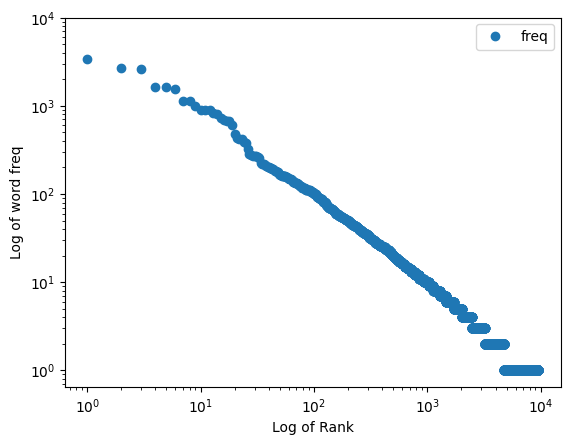

In [ ]:
# set up the dataframe
df2.reset_index(inplace=True)
df2.reset_index(inplace=True)
df2 = df2.iloc[:,[0,2]]
df2.columns = ['rank','freq']
df2 = df2.set_index('rank')

fig = plt.figure()
ax = fig.add_subplot(111)
df2.plot(style='o', logx=True, logy=True, ax=ax)

xlabel = plt.xlabel('Log of Rank')
ylabel = plt.ylabel('Log of word freq')
plt.show(block=False)

### 3. casual_tokenizer

In [ ]:
from nltk.tokenize.casual import casual_tokenize

In [ ]:
words = casual_tokenize(text, reduce_len=True, strip_handles=True)

In [ ]:
word_list = [x.lower() for x in words if x not in puncs]
len(word_list)

88590

In [ ]:
df3 = pd.DataFrame.from_dict(dict(Counter(word_list).most_common()),orient='index',columns=['freq'])

# set up the dataframe
df3.reset_index(inplace=True)
df3.reset_index(inplace=True)
df3 = df3.iloc[:,[0,2]]
df3.columns = ['rank','freq']
df3 = df3.set_index('rank')

fig = plt.figure()
ax = fig.add_subplot(111)
df3.plot(style='o', logx=True, logy=True, ax=ax)

xlabel = plt.xlabel('Log of Rank')
ylabel = plt.ylabel('Log of word freq')
plt.show(block=False)

NameError: name 'Counter' is not defined

# Question 4

In [ ]:
import string
import re
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

In [ ]:
def load_doc(filename):
    # open the file as read only 
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file 
    file.close()
    return text

In [ ]:
path = '/Users/yeabinmoon/Documents/ibs_course/BUS243_NLP/HW/data/movie_review/'

In [ ]:
df_pos = pd.DataFrame()
for filename in listdir(path+'pos'):
    text = load_doc(path+'pos/'+filename)
    temp = pd.DataFrame({'sentiment':[1],'text':[text]})
    df_pos = pd.concat([df_pos,temp],ignore_index= True)
df_neg = pd.DataFrame()
for filename in listdir(path+'neg'):
    text = load_doc(path+'neg/'+filename)
    temp = pd.DataFrame({'sentiment':[0],'text':[text]})
    df_neg = pd.concat([df_neg,temp],ignore_index= True)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_pos, test_pos = train_test_split(df_pos, test_size=0.15, random_state=42)
train_neg, test_neg = train_test_split(df_neg, test_size=0.15, random_state=42)

In [ ]:
train = pd.concat([train_pos,train_neg],ignore_index= True)
test = pd.concat([test_pos,test_neg],ignore_index= True)

In [ ]:
train

,sentiment,text
0,1,it is easy to label something sentimental or t...
1,1,as a devout atheist and an avowed believer in ...
2,1,losing a job is not an all too uncommon thing ...
3,1,"the central focus of michael winterbottom's "" ..."
4,1,"in one scene from "" the people vs . \nlarry fl..."
...,...,...
1695,0,another formula 'feel good' quirky comedy from...
1696,0,this well-conceived but ultra sugary coming-of...
1697,0,here's a rarity : a children's film that attem...
1698,0,can a horror movie truly be called a horror mo...


In [ ]:
test

,sentiment,text
0,1,"eight years after its release , disney has dec..."
1,1,one of the most popular subplots in the entire...
2,1,sometimes i find 19th century british costume ...
3,1,the start of this movie reminded me of parts f...
4,1,it may seem weird to begin a film about glam r...
...,...,...
295,0,i think that saying that the x-files is one of...
296,0,aspiring broadway composer robert ( aaron will...
297,0,lengthy and lousy are two words to describe th...
298,0,"when i ponder childhood memories past , one of..."


## (a)

In [ ]:
from nltk.tokenize.casual import casual_tokenize

In [ ]:
bags_of_words = []

In [ ]:
for text in train.text:
    bags_of_words.append(Counter(casual_tokenize(text)))

In [ ]:
df_bows = pd.DataFrame.from_records(bags_of_words)
df_bows = df_bows.fillna(0).astype(int) 
df_bows.shape

(1700, 44893)

In [ ]:
df_bows.head()

,it,is,easy,to,label,something,sentimental,or,tear,jerking,...,planting,ballisitic,must-be-improvised,snake-eyes,unrealistic-looking,mispaired,keitel's,woken,sly's,demolition
0,2,5,1,5,1,1,1,3,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,6,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,10,0,23,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,11,0,9,0,1,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,9,0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.naive_bayes import MultinomialNB 
nb = MultinomialNB()
nb.fit(df_bows, train.sentiment > 0)

MultinomialNB()

In [ ]:
train['nb_predict'] = nb.predict(df_bows).astype(int)

In [ ]:
train.head()

,sentiment,text,nb_predict
0,1,it is easy to label something sentimental or t...,1
1,1,as a devout atheist and an avowed believer in ...,1
2,1,losing a job is not an all too uncommon thing ...,1
3,1,"the central focus of michael winterbottom's "" ...",1
4,1,"in one scene from "" the people vs . \nlarry fl...",1


In [ ]:
train.sentiment.sum()/len(train) * 100

50.0

In [ ]:
from sklearn.metrics import confusion_matrix
# training set confusion matrix
confusion_matrix(train.sentiment, train.nb_predict)

array([[838,  12],
       [ 23, 827]])

In [ ]:
bags_of_words = []
for text in test.text:
    bags_of_words.append(Counter(casual_tokenize(text)))
df_test_bows = pd.DataFrame.from_records(bags_of_words)
df_test_bows = df_test_bows.fillna(0).astype(int)

In [ ]:
df_all_bows = pd.concat([df_bows,df_test_bows], ignore_index=True)
df_all_bows

,it,is,easy,to,label,something,sentimental,or,tear,jerking,...,merteuil,bitch-queen,de-virginize,cecile,caldwell,dork-chick,hargrove,invulnerable,defeating,hand-job
0,2,5,1,5,1,1,1,3,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6,0,6,0,0,0,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,10,0,23,0,1,0,1,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,11,0,9,0,1,1,3,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,9,0,11,0,0,0,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,16,49,0,46,0,0,0,4,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0,4,0,7,0,0,0,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,5,6,0,6,0,0,0,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,4,12,0,19,0,4,0,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_df_bows = df_all_bows.iloc[len(train):][df_bows.columns]
test_df_bows.shape

(300, 44893)

In [ ]:
test_df_bows = test_df_bows.fillna(0).astype(int)

In [ ]:
test['nb_predict'] = nb.predict(test_df_bows).astype(int)

In [ ]:
test

,sentiment,text,nb_predict
0,1,"eight years after its release , disney has dec...",1
1,1,one of the most popular subplots in the entire...,1
2,1,sometimes i find 19th century british costume ...,1
3,1,the start of this movie reminded me of parts f...,0
4,1,it may seem weird to begin a film about glam r...,1
...,...,...,...
295,0,i think that saying that the x-files is one of...,1
296,0,aspiring broadway composer robert ( aaron will...,1
297,0,lengthy and lousy are two words to describe th...,1
298,0,"when i ponder childhood memories past , one of...",0


In [ ]:
confusion_matrix(test.sentiment, test.nb_predict)

array([[131,  19],
       [ 22, 128]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(test.sentiment, test.nb_predict))
print(recall_score(test.sentiment, test.nb_predict))

0.8707482993197279
0.8533333333333334


## (b)

In [ ]:
train

,sentiment,text,nb_predict
0,1,it is easy to label something sentimental or t...,1
1,1,as a devout atheist and an avowed believer in ...,1
2,1,losing a job is not an all too uncommon thing ...,1
3,1,"the central focus of michael winterbottom's "" ...",1
4,1,"in one scene from "" the people vs . \nlarry fl...",1
...,...,...,...
1695,0,another formula 'feel good' quirky comedy from...,0
1696,0,this well-conceived but ultra sugary coming-of...,0
1697,0,here's a rarity : a children's film that attem...,0
1698,0,can a horror movie truly be called a horror mo...,0


In [ ]:
vectorizer = TfidfVectorizer(tokenizer=lambda text: casual_tokenize(text, reduce_len=True, strip_handles=True))

In [ ]:
model = vectorizer.fit_transform(train.text)
vector_template = OrderedDict((token, 0) for token in vectorizer.get_feature_names_out())

/opt/anaconda3/envs/NLP/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
document_vectors = []
for doc in model.todense().tolist():

    vec = copy.copy(vector_template)  

    for key, value in zip(vectorizer.get_feature_names_out(), doc):
        vec[key] = value
    document_vectors.append(vec)

In [ ]:
test_vec = vectorizer.transform(test.text).todense()

In [ ]:
test_vectors = []

for doc in test_vec.tolist():
    vec = copy.copy(vector_template)  

    for key, value in zip(vectorizer.get_feature_names_out(), doc):
        vec[key] = value
    test_vectors.append(vec)

In [ ]:
test['cos_predict'] = None

In [ ]:
cosine_sim(test_vectors[0],document_vectors[0])

0.2921126752377568

In [ ]:
temp = []
for itr in document_vectors:
    temp.append(cosine_sim(test_vectors[0], itr))

In [ ]:
temp = np.empty(len(document_vectors))
for itr in document_vectors:
    np.append(temp, cosine_sim(test_vectors[0], itr))
train.loc[np.argmax(temp),'sentiment']

In [ ]:
np_empty = np.empty(len(document_vectors))

In [ ]:
i = 0
for itr_test in test_vectors:
    temp = np_empty.copy()
    for itr in document_vectors:
        np.append(temp, cosine_sim(itr_test, itr))
    test.loc[i, 'cos_predict'] = train.loc[np.argmax(temp),'sentiment']
    i += 1
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227


KeyboardInterrupt: 

In [ ]:
test

,sentiment,text,nb_predict,cos_predict
0,1,"eight years after its release , disney has dec...",1,1
1,1,one of the most popular subplots in the entire...,1,1
2,1,sometimes i find 19th century british costume ...,1,None
3,1,the start of this movie reminded me of parts f...,0,None
4,1,it may seem weird to begin a film about glam r...,1,None
...,...,...,...,...
295,0,i think that saying that the x-files is one of...,1,None
296,0,aspiring broadway composer robert ( aaron will...,1,None
297,0,lengthy and lousy are two words to describe th...,1,None
298,0,"when i ponder childhood memories past , one of...",0,None


In [ ]:
confusion_matrix(test.sentiment, test.cos_predict)

In [ ]:
print(precision_score(test.sentiment, test.cos_predict))
print(recall_score(test.sentiment, test.cos_predict))

## (C)

In [ ]:
tfidf_docs = model.toarray()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=16)
pca.fit(tfidf_docs)

PCA(n_components=16)

In [ ]:
columns = ['topic{}'.format(i) for i in range(pca.n_components)]
pca_topic_vectors = pca.transform(tfidf_docs)
pca_topic_vectors = pd.DataFrame(pca_topic_vectors, columns=columns)

In [ ]:
pca_topic_vectors

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15
0,0.119957,-0.068865,0.014428,0.090777,0.002792,-0.057595,0.013496,0.069239,0.015896,-0.008201,0.005965,0.016148,0.079971,0.045302,-0.006795,0.008300
1,0.097271,-0.026228,-0.058710,0.052833,-0.074315,0.065355,0.156731,0.179301,-0.023476,-0.021322,-0.002073,0.036618,0.004502,0.063992,0.105089,-0.000303
2,-0.016007,0.006117,-0.058637,0.010144,0.072060,-0.019774,0.030444,-0.040855,0.024519,-0.025658,0.003534,0.001038,0.016463,-0.000079,-0.029469,-0.015006
3,-0.032189,0.096101,0.031842,-0.104653,0.052582,0.051323,-0.021396,0.017969,-0.022745,-0.003695,-0.005079,0.004408,-0.005342,-0.000338,-0.042326,0.038155
4,0.100176,0.083403,-0.084181,-0.061854,0.029944,0.042150,-0.046392,-0.041211,-0.048534,-0.044864,-0.015627,-0.001318,0.021411,-0.024305,-0.023049,0.069328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,-0.044800,-0.041247,-0.079100,-0.011064,0.087851,-0.050556,0.067274,0.121598,0.061879,-0.006322,-0.037488,0.011487,0.006271,0.055390,0.018347,0.005595
1696,-0.078076,-0.017804,-0.172289,0.034669,0.049116,-0.003412,0.000994,0.000401,0.042649,-0.018031,-0.043438,-0.010594,-0.019357,-0.020010,0.006650,-0.043569
1697,0.048574,-0.034741,-0.107154,0.095127,0.093768,0.022287,-0.016738,-0.071320,0.025271,-0.011241,-0.049013,-0.025748,0.005276,0.021344,0.037626,-0.072176
1698,0.012548,-0.064984,-0.010386,-0.108130,-0.066089,-0.003244,-0.020731,0.055789,-0.005486,-0.058835,-0.007522,0.003108,0.034541,0.035854,0.023021,-0.028483


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
lda = LDA(n_components=1)

In [ ]:
lda.fit(pca_topic_vectors, train.sentiment)   

LinearDiscriminantAnalysis(n_components=1)

In [ ]:
train['lda_predict'] = lda.predict(pca_topic_vectors)

In [ ]:
tfidf_test = vectorizer.transform(test.text).toarray()

In [ ]:
columns = ['topic{}'.format(i) for i in range(pca.n_components)]
test_pca_topic_vectors = pca.transform(tfidf_test)
test_pca_topic_vectors = pd.DataFrame(test_pca_topic_vectors, columns=columns)

In [ ]:
test['lda_predict'] = lda.predict(test_pca_topic_vectors)

In [ ]:
test

,sentiment,text,nb_predict,cos_predict,lda_predict
0,1,"eight years after its release , disney has dec...",1,1,0
1,1,one of the most popular subplots in the entire...,1,1,1
2,1,sometimes i find 19th century british costume ...,1,None,0
3,1,the start of this movie reminded me of parts f...,0,None,0
4,1,it may seem weird to begin a film about glam r...,1,None,1
...,...,...,...,...,...
295,0,i think that saying that the x-files is one of...,1,None,0
296,0,aspiring broadway composer robert ( aaron will...,1,None,0
297,0,lengthy and lousy are two words to describe th...,1,None,1
298,0,"when i ponder childhood memories past , one of...",0,None,0


In [ ]:
confusion_matrix(test.sentiment, test.lda_predict)

array([[107,  43],
       [ 42, 108]])

In [ ]:
print(precision_score(test.sentiment, test.lda_predict))
print(recall_score(test.sentiment, test.lda_predict))

0.7152317880794702
0.72
